In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np

In [2]:
#file reading
data=pd.read_csv('C:/Users/F/Downloads/archive/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#shape of data
data.shape

(200, 5)

In [4]:
#general statistic about dataset
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
#getting general information about a dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
#checking for missing values
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
#checking the unique values of a 'CustomerID'
data['CustomerID'].nunique()

200

In [8]:
#'CustomerID' is an index for customers, so we can ignore it
data=data.drop(['CustomerID'], axis=1)
data.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

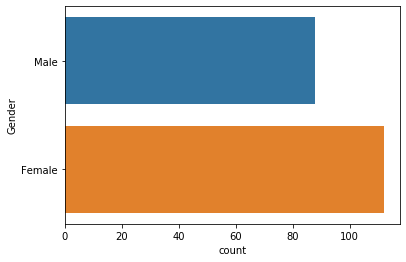

In [9]:
#gender determination of customers
import seaborn as sns
sns.countplot(y = 'Gender' , data = data)

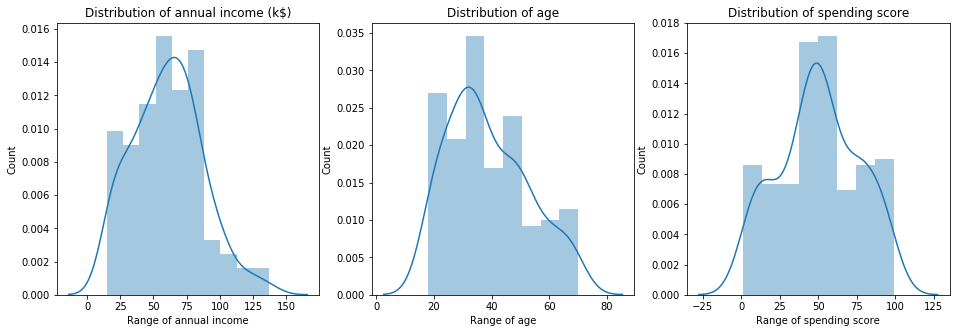

In [10]:
#distribution of important features
import matplotlib.pyplot as plt

plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of annual income (k$)')
plt.xlabel('Range of annual income')
plt.ylabel('Count')

plt.subplot(1,3,2)
sns.distplot(data['Age'])
plt.title('Distribution of age')
plt.xlabel('Range of age')
plt.ylabel('Count')

plt.subplot(1,3,3)
sns.distplot(data['Spending Score (1-100)'])
plt.title('Distribution of spending score')
plt.xlabel('Range of spending score')
plt.ylabel('Count')
plt.show()

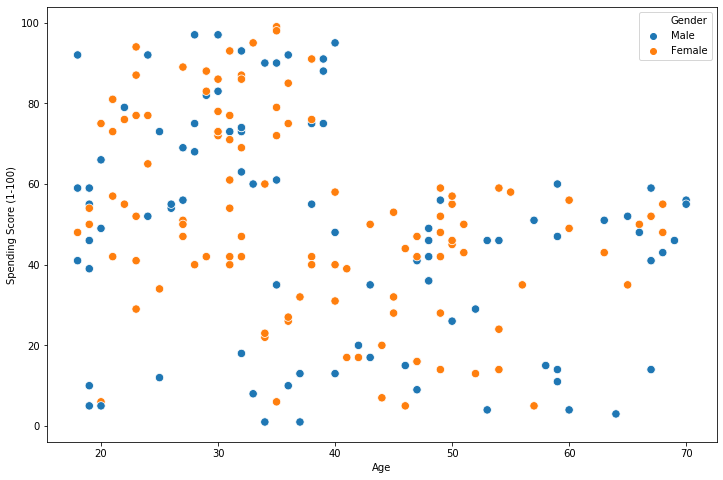

In [11]:
#scatter diagram of age and spending score of customers based on their gender
plt.figure(figsize=(12,8))
sns.scatterplot(data=data, x='Age', y='Spending Score (1-100)', hue='Gender', s=70)

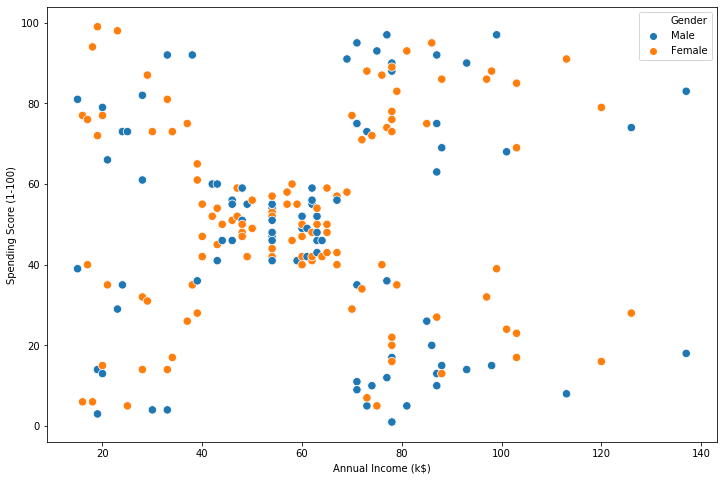

In [12]:
#scatter diagram of annual income and spending score of customers based on their gender
plt.figure(figsize=(12,8))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', s=70)

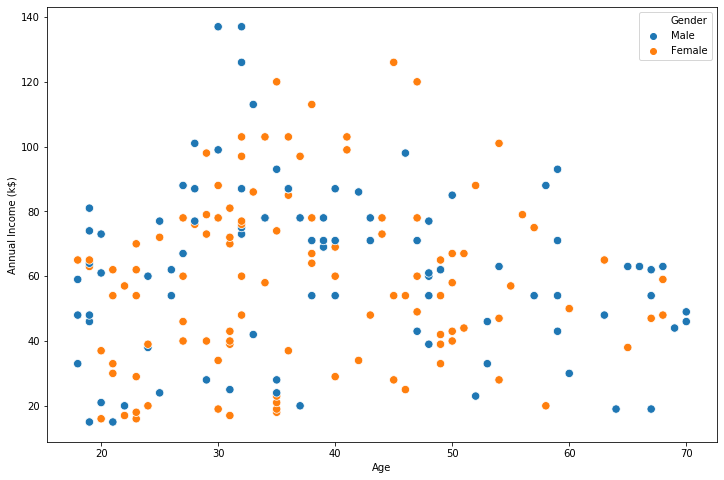

In [13]:
#scatter diagram of age and annual income of customers based on their gender
plt.figure(figsize=(12,8))
sns.scatterplot(data=data, x='Age', y='Annual Income (k$)', hue='Gender', s=70)

In [14]:
#we see a distinct pattern in the scatter diagram of annual income and spending score of customers
#we do not need the features 'Gender' and 'Age' for training, so we can remove it
data=data.drop(['Gender', 'Age'], axis=1)
data.columns

Index(['Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [15]:
#data scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data=scaler.fit_transform(data)

In [16]:
#importing clustering algorithm
from sklearn.cluster import KMeans

In [17]:
#training data based on two features to find optimal number of clusters 
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(data)
    inertia.append(algorithm.inertia_)

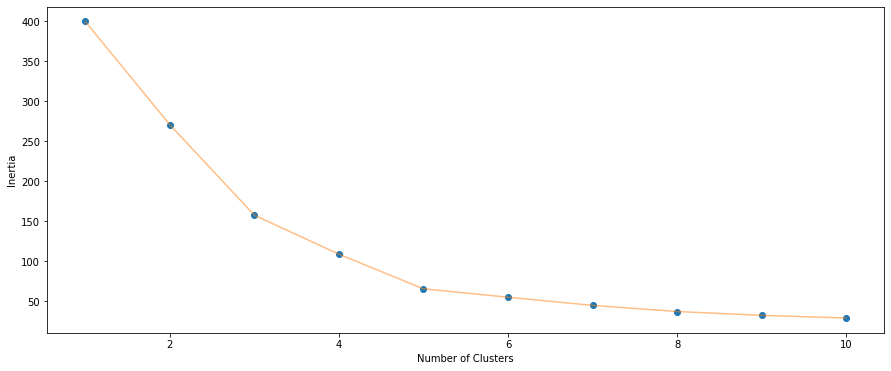

In [21]:
#finding the optimal number of clusters using the Elbow method
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [22]:
#retraining data with setting the number of clusters 5
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit_predict(data)
labels=algorithm.labels_

In [27]:
#for visualization, we must create a dataframe containing the original features and their corresponding labels
labels=pd.DataFrame(labels, columns=['Labels'])
df = pd.DataFrame(data, columns =['Annual Income (k$)', 'Spending Score (1-100)']) 
data=pd.concat([df, labels], axis=1)
data.head()

,Annual Income (k$),Spending Score (1-100),Labels
0,-1.738999,-0.434801,4
1,-1.738999,1.195704,2
2,-1.700830,-1.715913,4
3,-1.700830,1.040418,2
4,-1.662660,-0.395980,4


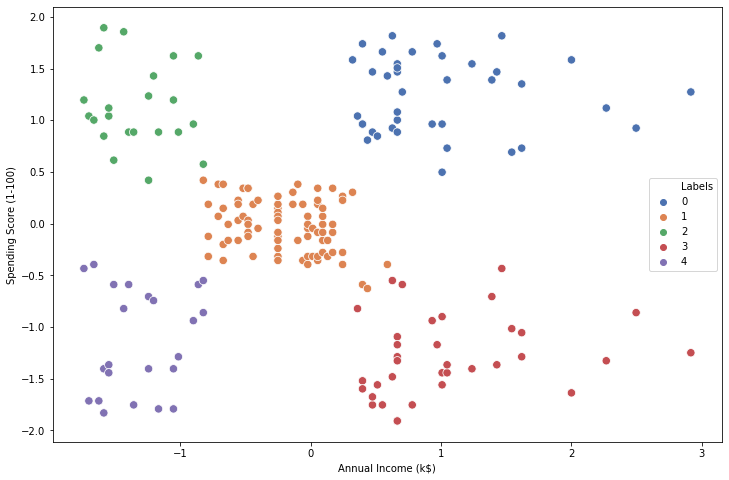

In [28]:
#cluster visualization
plt.figure(figsize=(12,8))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Labels', palette='deep', s=70)